In [ ]:
# Imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from joblib import dump, load
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('drive/MyDrive/Fake News Detection/data/fakenews_detection_dataset.xlsx')
display(df.head())

X = df['Text']
y = df['Verdict']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

tfidf_vectorizer = TfidfVectorizer()

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
dump(tfidf_vectorizer, 'tfidf.joblib') 
tfidf_test = tfidf_vectorizer.transform(X_test)
print(tfidf_train.shape)

tfidf_vectorizer_bigrams = TfidfVectorizer(ngram_range=(2, 2))
tfidf_train_bigrams = tfidf_vectorizer_bigrams.fit_transform(X_train)
tfidf_test_bigrams = tfidf_vectorizer_bigrams.transform(X_test)
print(tfidf_train_bigrams.shape)

,Verdict,Text
0,False,nieoczywisty rzeczywistość fsychologia pozytyw...
1,False,bęcwalstwo polski nauka odkryty w rpa nowy wir...
2,False,magmag cos zaczęlo wyłączać serce sportowiec c...
3,False,omikron atakować czyli kłamstwo kowidowych jed...
4,False,głowny portal zdrowie jeszuwiara yeshuang nasz...


(1337, 26554)
(1337, 178542)


In [ ]:
params = {'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}
nb_classifier = GridSearchCV(MultinomialNB(), params)

nb_classifier.fit(tfidf_train, y_train)
nb_y_pred = nb_classifier.predict(tfidf_test)
print(f'Best score (unigrams): {nb_classifier.best_score_} for params: {nb_classifier.best_params_}')
dump(nb_classifier, 'nb_classifier.joblib') 

nb_classifier.fit(tfidf_train_bigrams, y_train)
nb_y_pred_bigrams = nb_classifier.predict(tfidf_test_bigrams)
print(f'Best score (bigrams): {nb_classifier.best_score_} for params: {nb_classifier.best_params_}')

print(metrics.accuracy_score(y_test, nb_y_pred))
print(metrics.accuracy_score(y_test, nb_y_pred_bigrams))

Best score 0.8885711889988261 for param {'alpha': 0.03}
Best score 0.8855777293308738 for param {'alpha': 0.001}
0.8568935427574171
0.7905759162303665


In [ ]:
params = {'C': [0.01, 0.03, 0.1, 0.3, 1],
            'gamma': ['scale', 'auto']}
svc_classifier = GridSearchCV(SVC(), params)

svc_classifier.fit(tfidf_train, y_train)
svc_y_pred = svc_classifier.predict(tfidf_test)
print(f'Best score (unigrams): {svc_classifier.best_score_} for params: {svc_classifier.best_params_}')
dump(svc_classifier, 'svc_classifier.joblib') 

svc_classifier.fit(tfidf_train_bigrams, y_train)
svc_y_pred_bigrams = svc_classifier.predict(tfidf_test_bigrams)
print(f'Best score (bigrams): {svc_classifier.best_score_} for params: {svc_classifier.best_params_}')

print(metrics.accuracy_score(y_test, svc_y_pred))
print(metrics.accuracy_score(y_test, svc_y_pred_bigrams))

Best score 0.913991838560009 for param {'C': 1, 'gamma': 'scale'}
Best score 0.6716417910447763 for param {'C': 1, 'gamma': 'scale'}
0.9197207678883071
0.7102966841186736


In [ ]:
params = {'n_estimators': [10, 30, 100, 300, 1000]}
rf_classifier = GridSearchCV(RandomForestClassifier(), params)

rf_classifier.fit(tfidf_train, y_train)
rf_y_pred = rf_classifier.predict(tfidf_test)
print(f'Best score (unigrams): {rf_classifier.best_score_} for params: {rf_classifier.best_params_}')
dump(rf_classifier, 'rf_classifier.joblib') 

rf_classifier.fit(tfidf_train_bigrams, y_train)
rf_y_pred_bigrams = rf_classifier.predict(tfidf_test_bigrams)
print(f'Best score (bigrams): {rf_classifier.best_score_} for params: {rf_classifier.best_params_}')

print(metrics.accuracy_score(y_test, rf_y_pred))
print(metrics.accuracy_score(y_test, rf_y_pred_bigrams))

Best score 0.8878109452736318 for param {'n_estimators': 1000}
Best score 0.8698725473754821 for param {'n_estimators': 1000}
0.900523560209424
0.8726003490401396


              precision    recall  f1-score   support

       False       0.86      0.97      0.91       241
        True       0.97      0.89      0.93       332

    accuracy                           0.92       573
   macro avg       0.92      0.93      0.92       573
weighted avg       0.93      0.92      0.92       573



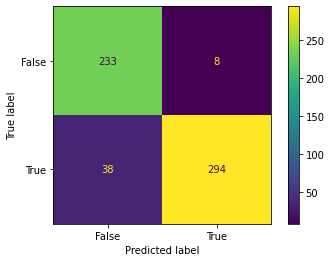

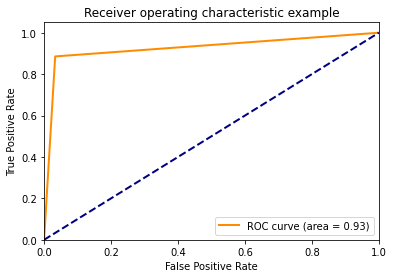

              precision    recall  f1-score   support

       False       0.88      0.36      0.51       241
        True       0.68      0.96      0.79       332

    accuracy                           0.71       573
   macro avg       0.78      0.66      0.65       573
weighted avg       0.76      0.71      0.68       573



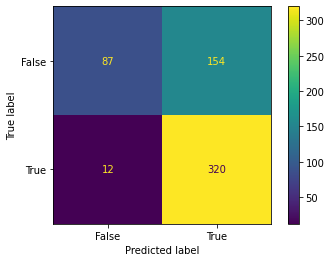

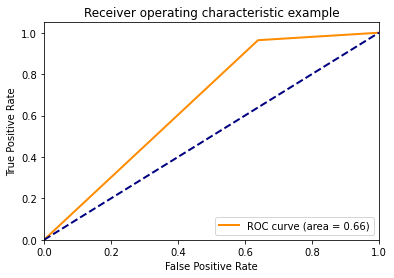

In [ ]:
# Calculate the confusion matrix: cm
metrics.ConfusionMatrixDisplay.from_predictions(y_test, svc_y_pred)
print(metrics.classification_report(y_test, svc_y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, svc_y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

# Calculate the confusion matrix: cm
metrics.ConfusionMatrixDisplay.from_predictions(y_test, svc_y_pred_bigrams)
print(metrics.classification_report(y_test, svc_y_pred_bigrams))

fpr, tpr, thresholds = metrics.roc_curve(y_test, svc_y_pred_bigrams)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()